In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split , cross_val_score
%matplotlib inline


ModuleNotFoundError: No module named 'pandas'

## I.Exploratory data analysis


In [ ]:
data  = pd.read_csv("../Sihati-4.0/data/fever_infection.csv")
data.drop('id', axis=1, inplace=True)
data.head(10)

,gender,age,heart_rate,temperature,SpO2_saturation,bpm,Health_status
0,male,66.0,70,38.6,88.0,75,Infected
1,female,56.0,74,39.6,88.0,70,Infected
2,male,46.0,82,37.2,98.0,83,Non Infected
3,female,60.0,90,38.6,98.0,75,Non Infected
4,male,58.0,72,39.6,93.0,78,Infected
5,female,44.0,72,37.2,93.0,69,Infected
6,male,34.0,67,38.6,98.0,73,Non Infected
7,male,37.0,72,39.6,97.0,73,Non Infected
8,male,39.0,65,37.2,96.0,84,Non Infected
9,male,56.0,76,38.0,92.0,68,Infected


In [ ]:
data.dtypes 

gender              object
age                float64
heart_rate           int64
temperature        float64
SpO2_saturation    float64
bpm                  int64
Health_status       object
dtype: object

In [ ]:
data.describe()

,age,heart_rate,temperature,SpO2_saturation,bpm
count,843.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,49.483689,89.812903,38.562488,66.707465,71.221198
std,18.255334,19.685747,4.592419,30.251069,13.148559
min,0.250000,47.000000,36.000000,20.000000,44.000000
25%,35.000000,72.000000,38.000000,30.000000,59.000000
50%,51.000000,91.000000,38.100000,82.000000,72.000000
75%,64.000000,110.000000,38.500000,87.300000,81.000000
max,96.000000,120.000000,95.000000,340.000000,109.000000


In [ ]:
#renaming some columns for eas of use 
data.rename(columns={"heart_rate":"heart" , "SpO2_saturation":"spo2","Health_status":"status"}, inplace=True)
data.head()

,gender,age,heart,temperature,spo2,bpm,status
0,male,66.0,70,38.6,88.0,75,Infected
1,female,56.0,74,39.6,88.0,70,Infected
2,male,46.0,82,37.2,98.0,83,Non Infected
3,female,60.0,90,38.6,98.0,75,Non Infected
4,male,58.0,72,39.6,93.0,78,Infected


In [ ]:
data.count()

gender          902
age             843
heart          1085
temperature    1085
spo2           1085
bpm            1085
status         1085
dtype: int64

### handling na values 

In [ ]:
#dealing with missing values 
print(data.isnull().sum())

gender         183
age            242
heart            0
temperature      0
spo2             0
bpm              0
status           0
dtype: int64


In [ ]:
data = data.dropna()
data.count()

gender         825
age            825
heart          825
temperature    825
spo2           825
bpm            825
status         825
dtype: int64

### dealing with outliers (if found)

In [ ]:
data.head()

,gender,age,heart,temperature,spo2,bpm,status
0,male,66.0,70,38.6,88.0,75,Infected
1,female,56.0,74,39.6,88.0,70,Infected
2,male,46.0,82,37.2,98.0,83,Non Infected
3,female,60.0,90,38.6,98.0,75,Non Infected
4,male,58.0,72,39.6,93.0,78,Infected


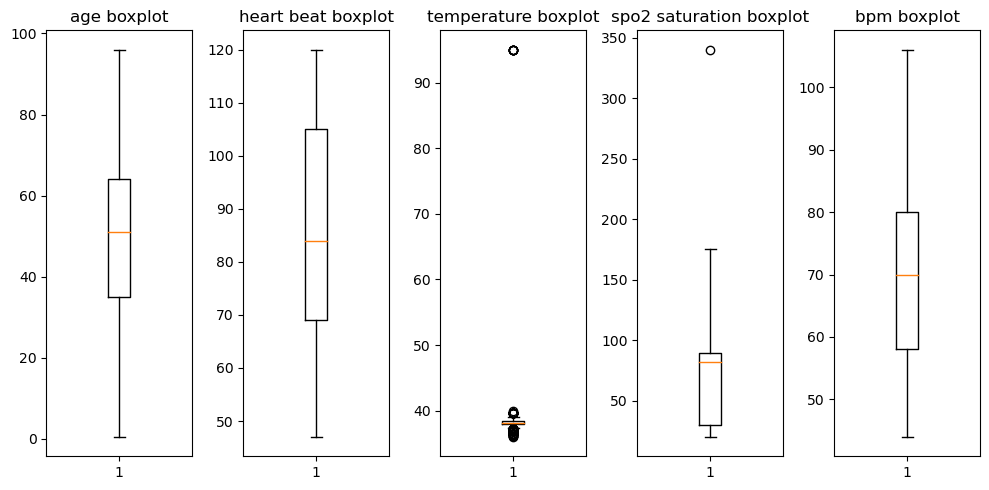

In [ ]:
fig , axs = plt.subplots(1 , 5 , figsize=(10, 5))

axs[0].boxplot(data["age"]);
axs[0].set_title("age boxplot")

axs[1].boxplot(data['heart']);
axs[1].set_title("heart beat boxplot");

axs[2].boxplot(data['temperature']);
axs[2].set_title("temperature boxplot");

axs[3].boxplot(data['spo2']);
axs[3].set_title("spo2 saturation boxplot");

axs[4].boxplot(data['bpm']);
axs[4].set_title("bpm boxplot");
plt.tight_layout()



(array([708., 110.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   7.]),
 array([36.  , 38.95, 41.9 , 44.85, 47.8 , 50.75, 53.7 , 56.65, 59.6 ,
        62.55, 65.5 , 68.45, 71.4 , 74.35, 77.3 , 80.25, 83.2 , 86.15,
        89.1 , 92.05, 95.  ]),
 <BarContainer object of 20 artists>)

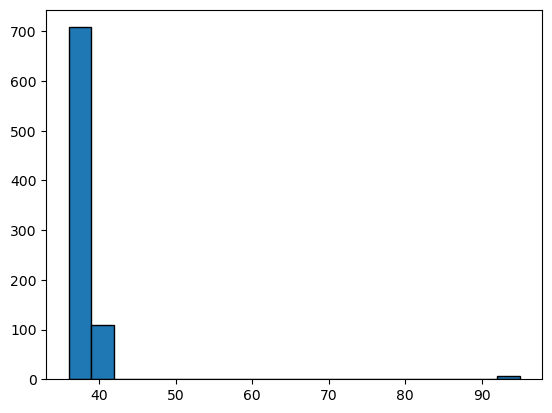

In [ ]:
plt.hist(data["temperature"], edgecolor='black', bins=20)

(array([231.,  17.,  29., 156., 383.,   0.,   2.,   0.,   0.,   6.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 20.,  36.,  52.,  68.,  84., 100., 116., 132., 148., 164., 180.,
        196., 212., 228., 244., 260., 276., 292., 308., 324., 340.]),
 <BarContainer object of 20 artists>)

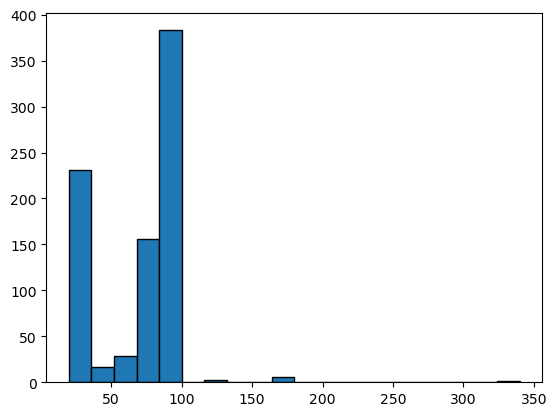

In [ ]:
plt.hist(data["spo2"], edgecolor='black', bins=20)

### we can't use the z-score cuz the two variables don't follow the normal distrubtion 
### so we gonna use the IQR : Inter Quantile Range 
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute IQR=Q3-Q1
- compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

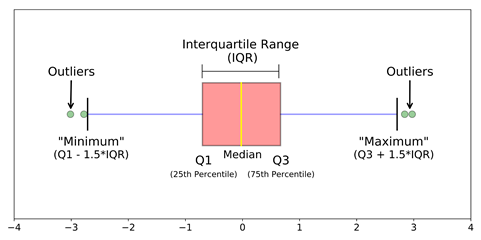

In [ ]:
import pandas as pd

def remove_outliers_iqr_inplace(df, column_name):
    # Calculate quartiles and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and filter out outliers in-place
    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    df.drop(df[outliers].index, inplace=True)

    # Reset index
    df.reset_index(drop=True, inplace=True)

remove_outliers_iqr_inplace(data, 'spo2')
remove_outliers_iqr_inplace(data,'temperature')


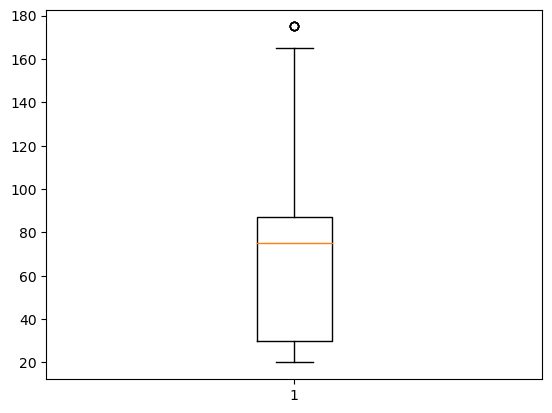

In [ ]:
plt.boxplot(data['spo2']);

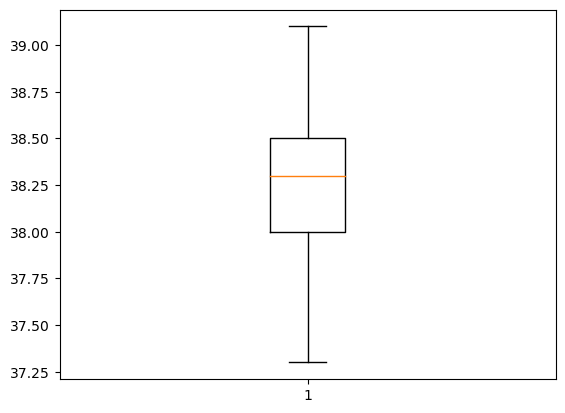

In [ ]:
plt.boxplot(data['temperature']);

In [ ]:
data.count()

gender         692
age            692
heart          692
temperature    692
spo2           692
bpm            692
status         692
dtype: int64

- now we have a clean dataset 

In [ ]:
data.head()


,gender,age,heart,temperature,spo2,bpm,status
0,male,66.0,70,38.6,88.0,75,Infected
1,female,60.0,90,38.6,98.0,75,Non Infected
2,male,34.0,67,38.6,98.0,73,Non Infected
3,male,56.0,76,38.0,92.0,68,Infected
4,female,18.0,73,38.6,50.0,73,Infected


In [ ]:
df = pd.get_dummies(data)
df

,age,heart,temperature,spo2,bpm,gender_female,gender_male,status_Infected,status_Non Infected,status_Non infected,status_Non infected
0,66.0,70,38.6,88.0,75,False,True,True,False,False,False
1,60.0,90,38.6,98.0,75,True,False,False,True,False,False
2,34.0,67,38.6,98.0,73,False,True,False,True,False,False
3,56.0,76,38.0,92.0,68,False,True,True,False,False,False
4,18.0,73,38.6,50.0,73,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
687,58.0,110,38.0,30.0,72,False,True,True,False,False,False
688,27.0,109,38.0,30.0,64,True,False,True,False,False,False
689,25.0,109,38.0,30.0,60,True,False,True,False,False,False
690,45.0,107,38.0,30.0,68,True,False,True,False,False,False


In [ ]:
df.drop(['status_Non Infected','status_Non infected'
        ,'status_Non infected ','gender_female'], axis=1 , inplace=True)
df

,age,heart,temperature,spo2,bpm,gender_male,status_Infected
0,66.0,70,38.6,88.0,75,True,True
1,60.0,90,38.6,98.0,75,False,False
2,34.0,67,38.6,98.0,73,True,False
3,56.0,76,38.0,92.0,68,True,True
4,18.0,73,38.6,50.0,73,False,True
...,...,...,...,...,...,...,...
687,58.0,110,38.0,30.0,72,True,True
688,27.0,109,38.0,30.0,64,False,True
689,25.0,109,38.0,30.0,60,False,True
690,45.0,107,38.0,30.0,68,False,True


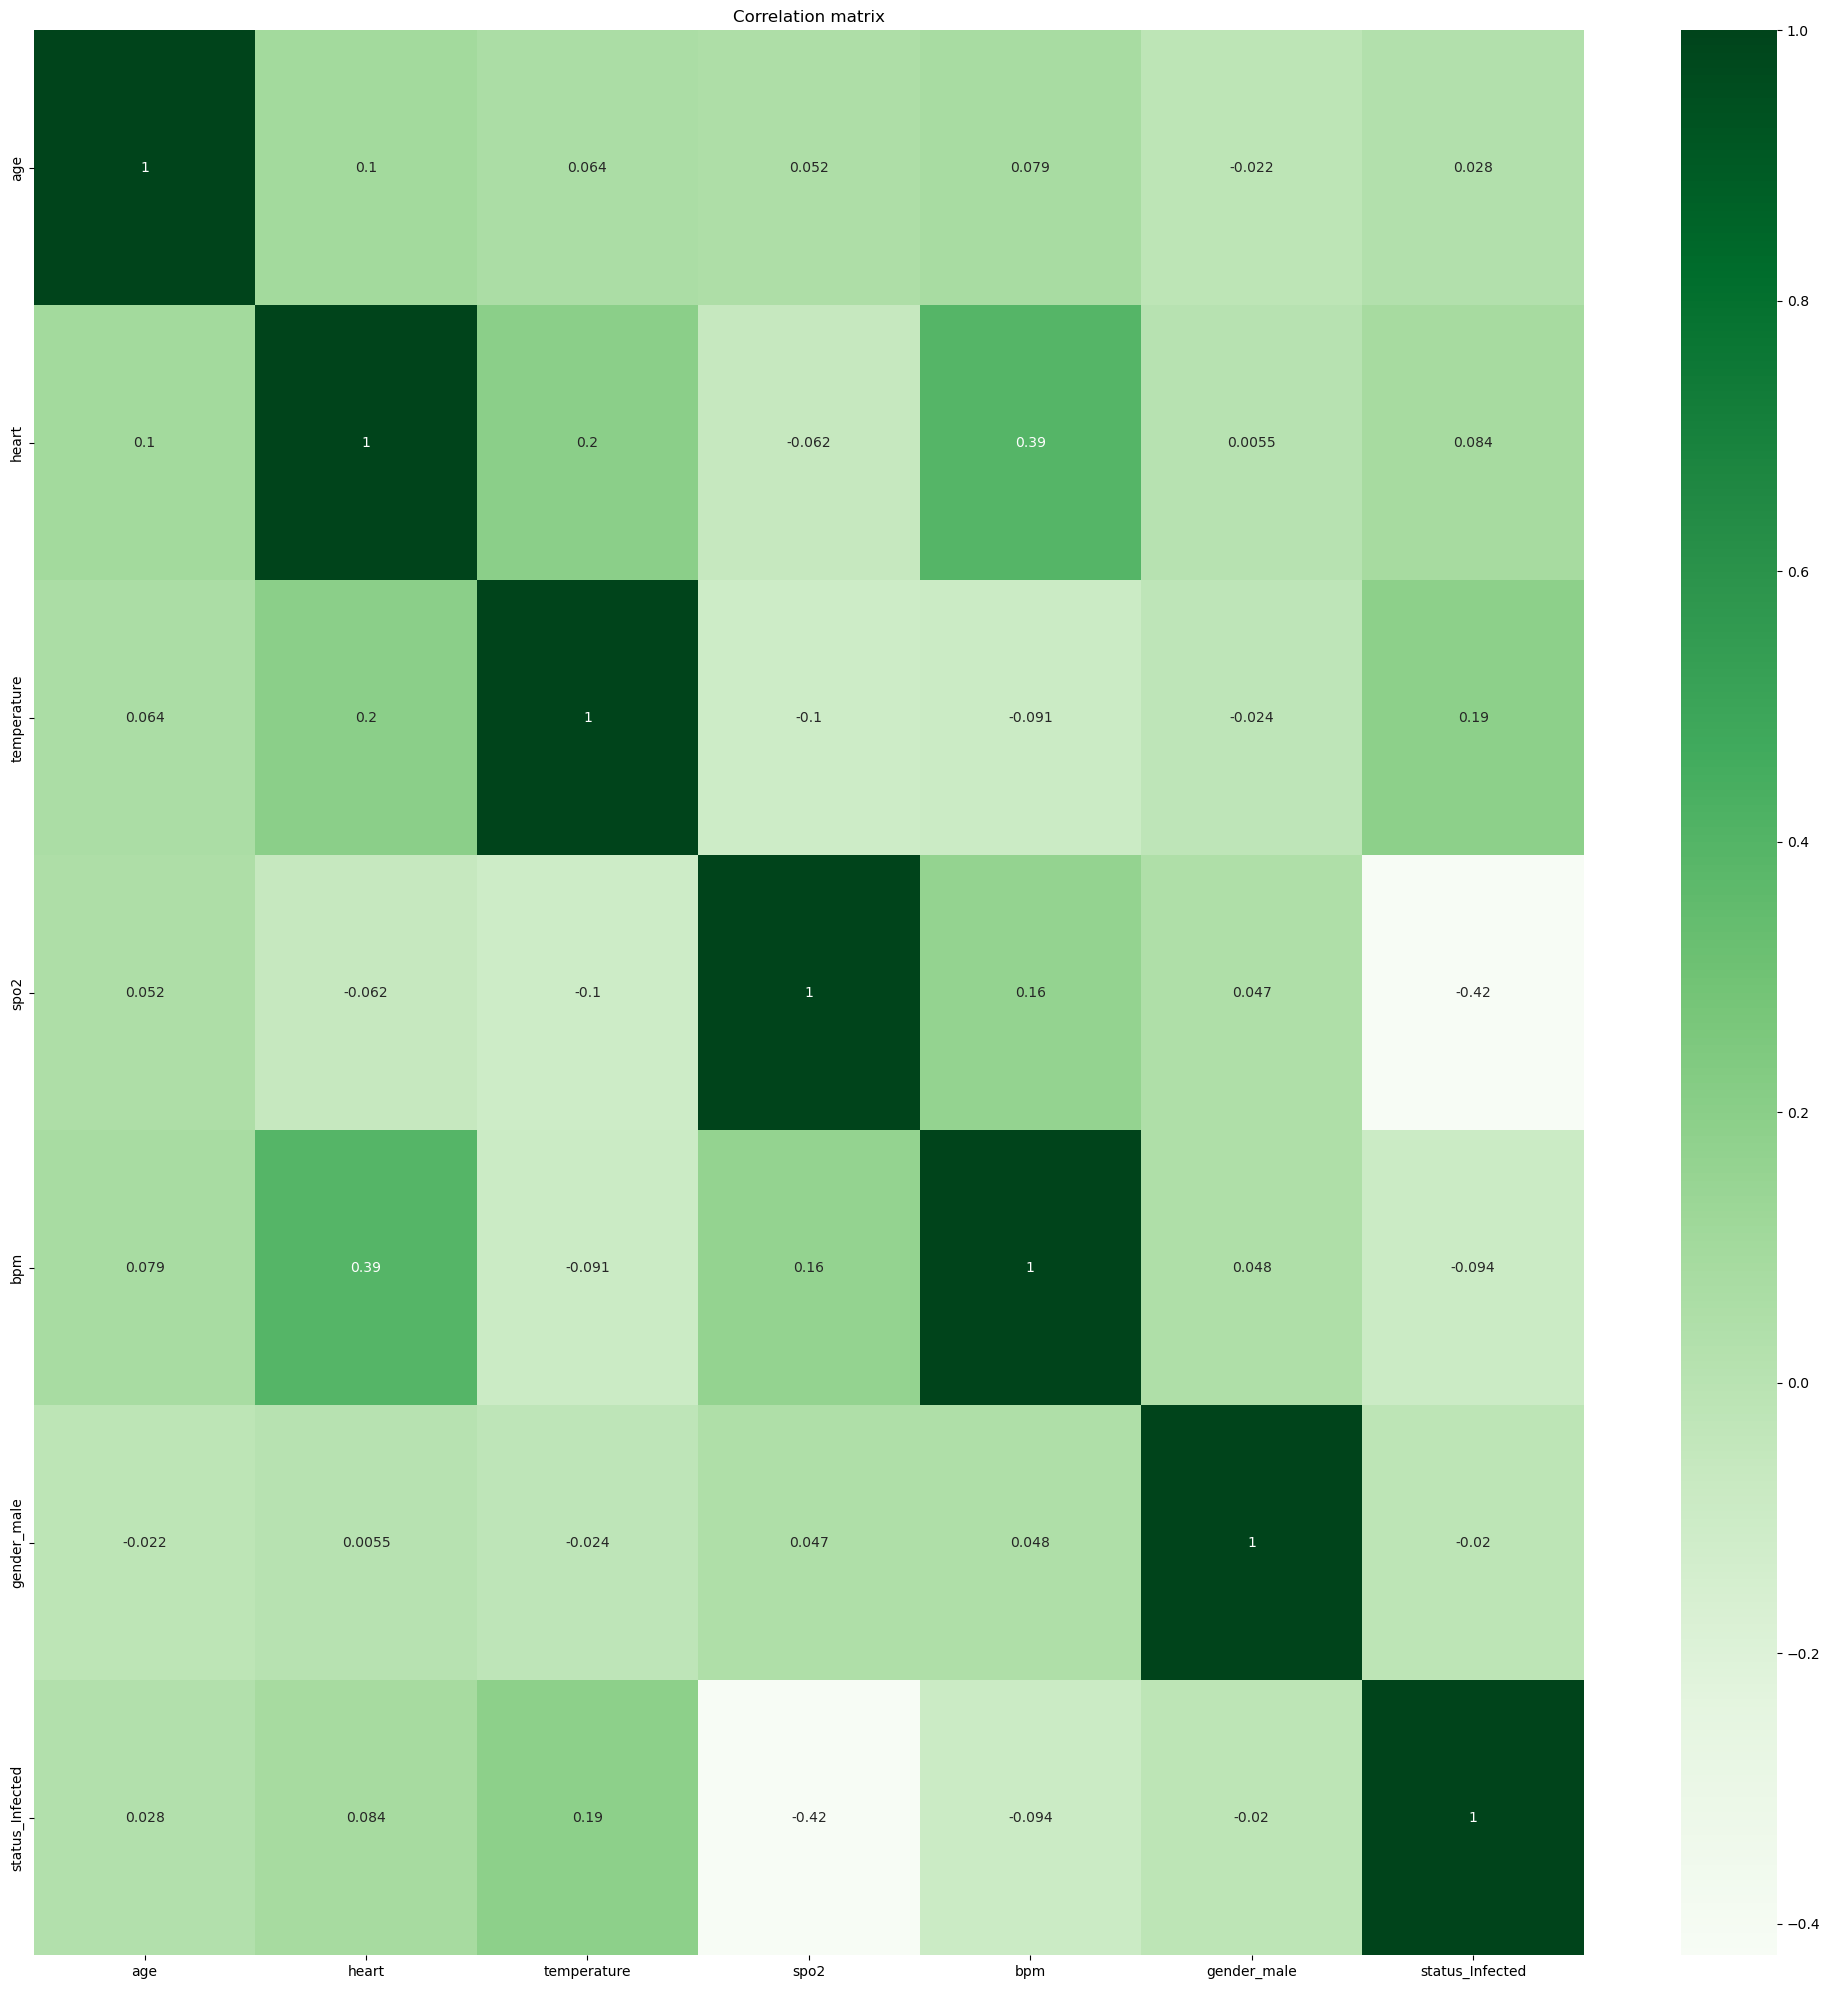

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))
plt.title('Correlation matrix')
sns.heatmap(df.corr(),annot=True , cmap='Greens')
plt.show()

In [ ]:
np.random.seed(42)
x= df.drop('status_Infected', axis=1 )
y = df['status_Infected']


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)


In [ ]:
x_test.shape

(139, 6)

f1
RFC: 0.994777 (0.006802)
ExtraTreesClassifier: 0.970535 (0.046134)
DecisionTreeClassifier: 0.995506 (0.006100)
AdaBoostClassifier: 0.993936 (0.006621)
KNN: 0.956744 (0.069747)
CART: 0.995407 (0.006155)
SVM: 0.947333 (0.086365)
ensemble_voting: 0.993936 (0.006621)
accuracy
RFC: 0.991366 (0.011512)
ExtraTreesClassifier: 0.952464 (0.061589)
DecisionTreeClassifier: 0.992816 (0.009614)
AdaBoostClassifier: 0.989917 (0.011243)
KNN: 0.931056 (0.097257)
CART: 0.994265 (0.009495)
SVM: 0.911035 (0.134299)
ensemble_voting: 0.991366 (0.011512)


<Figure size 640x480 with 0 Axes>

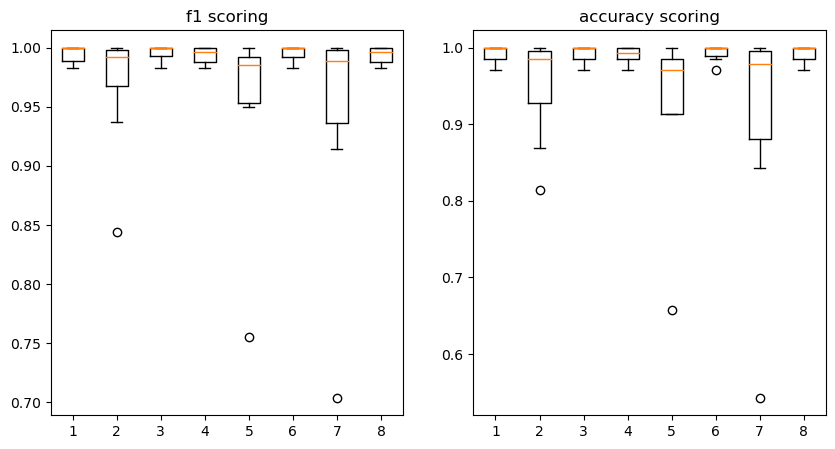

In [ ]:
# importing libraries
from sklearn.model_selection import cross_val_score , KFold 
from sklearn.metrics import f1_score 
from sklearn.svm import SVC , LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ensemble_models = [ ('RFC',RandomForestClassifier()),
                    ('CART',DecisionTreeClassifier()),
                    ('ExtraTreesClassifier', ExtraTreesClassifier()),
                    ('DecisionTreeClassifier' ,DecisionTreeClassifier()),
                    ('AdaBoostClassifier', AdaBoostClassifier())]
ensemble = VotingClassifier(estimators=ensemble_models , voting='hard')

models = []
models.append(('RFC',RandomForestClassifier()))
models.append(('ExtraTreesClassifier', ExtraTreesClassifier()))
models.append(('DecisionTreeClassifier' ,DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('ensemble_voting', ensemble))
# evaluate each model in turn
results1 = []
results2 = []
names = []
scoring1 = 'f1'

print(scoring1)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring1)
    results1.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# f1_scorer = make_scorer(f1_score)
scoring2 = 'accuracy'
print(scoring2)
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring2)
    results2.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithms comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
fig , ax = plt.subplots(nrows= 1 ,
                        ncols=2,
                        figsize = (10,5))
ax[0].boxplot(results1);
ax[1].boxplot(results2);
# ax[0].set_xticklabels(names)
ax[0].title.set_text(f'{scoring1} scoring')
ax[1].title.set_text(f'{scoring2} scoring')
# ax[1].set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        13
        True       1.00      1.00      1.00       126

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



In [ ]:
df['status_Infected'].value_counts()

status_Infected
True     622
False     70
Name: count, dtype: int64

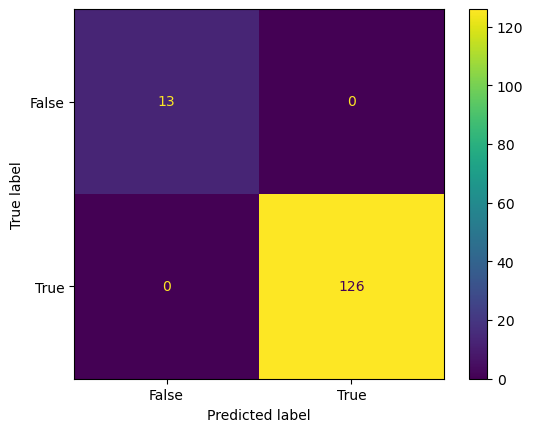

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test , y_pred= y_preds);

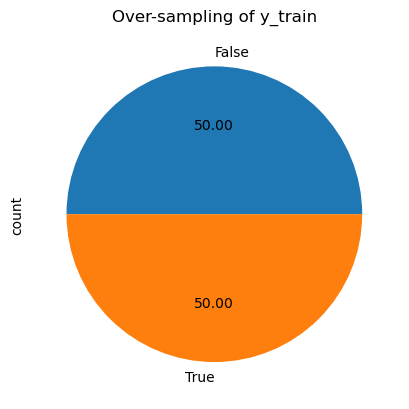

In [ ]:
from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy=1)
x_train_resampled , y_train_resampled = ros.fit_resample(x_train, y_train)

ax = y_train_resampled.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling of y_train")

,age,heart,temperature,spo2,bpm,gender_male
0,75.000000,105,38.000000,98.000000,69,True
1,50.000000,64,37.800000,89.000000,79,True
2,68.000000,83,38.000000,97.000000,64,False
3,55.000000,71,38.900000,75.000000,71,True
4,33.000000,112,38.500000,87.300000,68,True
...,...,...,...,...,...,...
987,35.836351,88,38.763336,97.000000,59,True
988,34.673088,67,37.300000,97.000000,88,False
989,64.472956,89,37.647296,73.029941,101,True
990,75.000000,87,38.000000,98.000000,76,True


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(x_train_resampled, y_train_resampled)
y_preds = clf.predict(x_test)


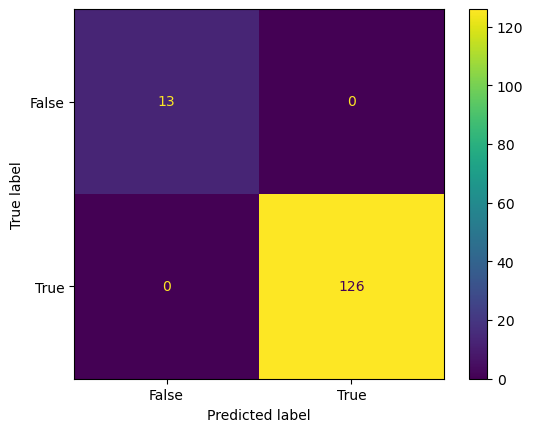

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test , y_pred= y_preds);

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        13
        True       1.00      1.00      1.00       126

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139

